In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

In [ ]:
df.shape

(10167, 21)

In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

x = df[features]

y = df['price']

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(1525,)

In [ ]:
y_test.shape

(1525,)

In [ ]:
y_test

555      725000.0
8624     315000.0
9149     825000.0
9601     760000.0
7549     440000.0
          ...    
4780     470000.0
9856     600000.0
4492     327000.0
4375    1050000.0
6114     185000.0
Name: price, Length: 1525, dtype: float64

In [ ]:
y_pred

array([ 878451.19042586,  243375.96635834,  847863.38517272, ...,
        252063.97048285, 1046735.98799143,  320116.96410729])

In [ ]:
from sklearn import metrics

In [ ]:
print(model.score(x_test, y_test))

0.7098127786266488


In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))

122988.61274245786


In [ ]:
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

0.25332179505521535


In [ ]:
print(model.coef_)

[-4.36178301e+04  3.03385749e+04  1.21118408e+02  1.58102000e-01
 -8.59930528e+02  6.74780219e+05  4.99620591e+04  2.59392869e+04
  9.35771433e+04  7.70168788e+01  4.41015289e+01 -2.95381865e+03
  2.21641438e+01 -5.55864700e+02  5.85431871e+05 -1.68219926e+05
  2.72203781e+01 -5.19469515e-01]


In [ ]:
print(model.predict(np.array([10,6.00,1180,5650,1.0,	0,	0,	3,	7,	1180,	0,	1955,	0,98028,	47.7379,	-122.233,	2720,	8062	]).reshape(1,-1)))

[305726.22213834]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
x_test.shape

(1525, 18)

In [ ]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
555,4,2.50,2990,29170,2.0,0,3,3,9,2990.0,0.0,1999.0,0.0,98059.0,47.5146,-122.117,3715.0,29170.0
8624,2,1.00,860,8308,1.0,0,0,3,7,860.0,0.0,1948.0,0.0,98146.0,47.5080,-122.378,1200.0,8308.0
9149,4,2.50,2560,4000,2.0,0,0,5,8,1610.0,950.0,1929.0,0.0,98117.0,47.6885,-122.386,1760.0,4000.0
9601,6,3.75,3810,6150,2.0,0,0,4,8,3810.0,0.0,1977.0,0.0,98103.0,47.6940,-122.340,1830.0,5125.0
7549,3,2.50,1390,4997,2.0,0,0,3,7,1390.0,0.0,2004.0,0.0,98065.0,47.5303,-121.855,2340.0,4125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4780,4,2.50,2320,12042,1.0,0,0,4,7,1320.0,1000.0,1975.0,0.0,98072.0,47.7630,-122.160,2160.0,7054.0
9856,3,2.50,2680,43995,2.0,0,0,3,9,2680.0,0.0,1986.0,0.0,98077.0,47.7655,-122.086,2520.0,37277.0
4492,4,2.25,1620,106722,1.0,0,0,3,8,1200.0,420.0,1980.0,0.0,98042.0,47.3394,-122.091,1620.0,38400.0
4375,3,3.00,3250,5093,2.0,0,3,3,10,3250.0,0.0,2004.0,0.0,98146.0,47.5123,-122.390,2820.0,7752.0


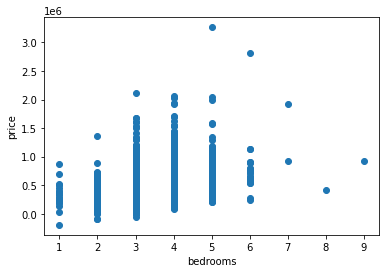

In [ ]:
plt.scatter(x_test['bedrooms'],y_pred)
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()